In [ ]:
import pandas as pd

## Disliking penalty-homophily experiment

In [49]:
df = pd.read_csv('disliking.csv')

### Evolution of churlishness

In [50]:
df.head()

,dislike_penalty,homophily,prop_churlish,prop_covert,timestep,trial_idx
0,0.0,0.0,0.42,0.47,0,0
1,0.0,0.0,0.39,0.45,1,1
2,0.0,0.0,0.37,0.45,2,2
3,0.0,0.0,0.39,0.45,3,3
4,0.0,0.0,0.40,0.44,4,4


Text(0.5, 1.0, 'Covert signalers over time for various\n($d=\\delta$, w) pairs')

/Users/mt/Library/Python/3.7/lib/python/site-packages/IPython/core/pylabtools.py:132: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  fig.canvas.print_figure(bytes_io, **kw)


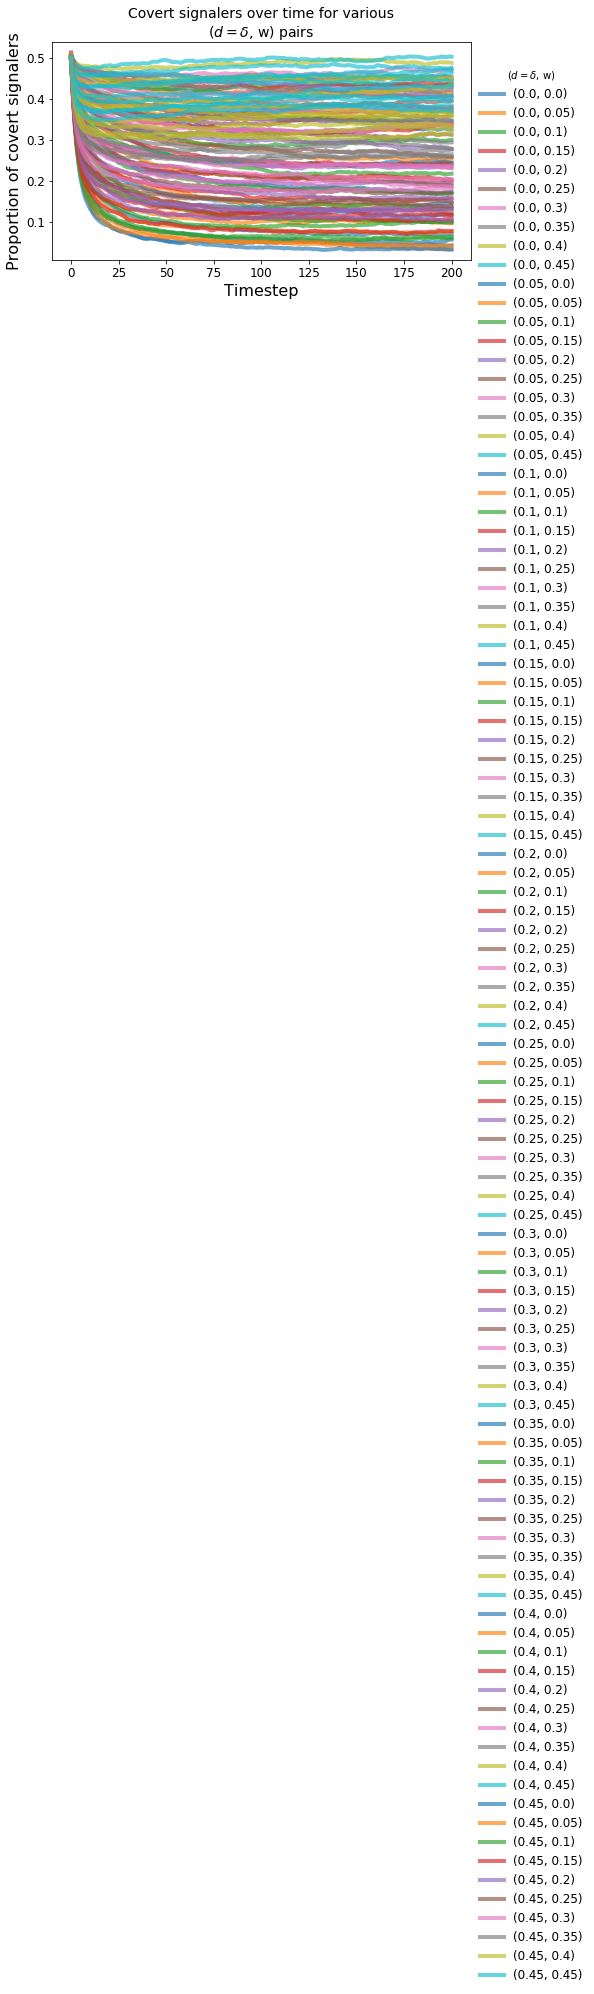

In [51]:
gb_mean = df.groupby(
    ['dislike_penalty', 'homophily', 'timestep']
)['prop_churlish'].mean()

means = gb_mean.unstack(level=(0,1))

means.plot(lw=4, alpha=0.65, figsize=(7.5, 4))

plt.legend(bbox_to_anchor= (1.01, 0.9), ncol=1, title='($d=\delta$, w)',
            borderaxespad=0, frameon=False, prop={'size': 12})
plt.xticks(size=12)
plt.yticks(size=12)
plt.ylabel('Proportion of covert signalers', size=16)
plt.xlabel('Timestep', size=16)
plt.title('Covert signalers over time for various\n($d=\delta$, w) pairs', size=14)

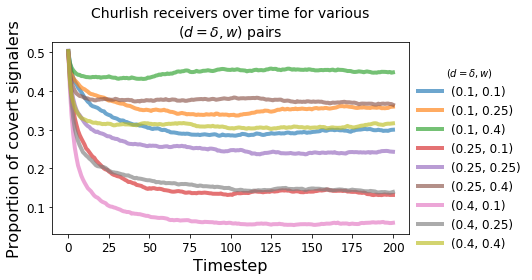

In [52]:
homophilies = [0.1, 0.25, 0.4]
dislike_penalties = [0.1, 0.25, 0.4]

df_lim = df[df.homophily.isin(homophilies) 
            & df.dislike_penalty.isin(dislike_penalties)]

gb_mean_lim = df_lim.groupby(['dislike_penalty', 'homophily', 'timestep']
                     )['prop_churlish'].mean()

means_lim = gb_mean_lim.unstack(level=(0,1))

means_lim.plot(lw=4, alpha=0.65, figsize=(7.5, 4))

plt.legend(bbox_to_anchor= (1.01, 0.9), ncol=1, title='$(d=\delta, w)$',
            borderaxespad=0, frameon=False, prop={'size': 12})

plt.xticks(size=12)
plt.yticks(size=12)
plt.ylabel('Proportion of covert signalers', size=16)
plt.xlabel('Timestep', size=16)
plt.title('Churlish receivers over time for various\n$(d=\delta, w)$ pairs', size=14)
plt.savefig('/Users/mt/workspace/id-sig/reports/Figures/dislikingHomophilyChurlishSeries.pdf')

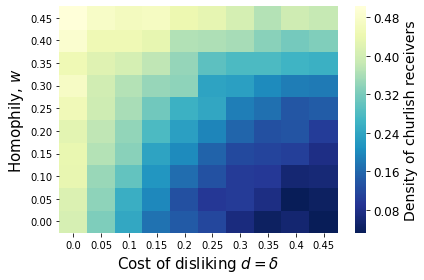

In [53]:
gb_mean = df.groupby(
    ['dislike_penalty', 'homophily', 'timestep']
)['prop_churlish'].mean()

means = gb_mean.unstack(level=(0,1))

final_means = means[means.index == 200]

ax = sns.heatmap(final_means.stack(), cmap='YlGnBu_r',
                cbar_kws={'label': 'Density of churlish receivers'})

# Set size of colorbar title.
ax.figure.axes[-1].yaxis.label.set_size(14)

# Set size of colorbar tick labels.
ax.collections[0].colorbar.ax.tick_params(labelsize=12)

# Clean up some other things.
ax.invert_yaxis()
# ax.set_yticklabels(['0.1', '0.25', '0.4'])
ax.set_ylabel('Homophily, $w$', size=15)
ax.set_xlabel('Cost of disliking $d=\delta$', size=15)


# relative_receptivity = df.receptivity.unique() / 0.5
# relative_receptivity.sort()
# ax.set_xticklabels(relative_receptivity)
ax.set_yticklabels([f'{y:.2f}' for y in np.arange(0, 0.46, 0.05)]);

plt.savefig(
'/Users/mt/workspace/id-sig/reports/Figures/churlishDensityVsDislikingHomophilyCoevo.pdf'
)

### Evolution of covert signaling

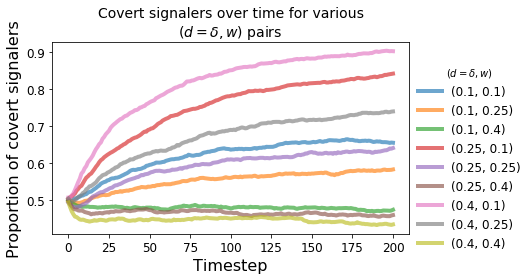

In [54]:
homophilies = [0.1, 0.25, 0.4]
dislike_penalties = [0.1, 0.25, 0.4]

df_lim = df[df.homophily.isin(homophilies) 
            & df.dislike_penalty.isin(dislike_penalties)]

gb_mean_lim = df_lim.groupby(['dislike_penalty', 'homophily', 'timestep']
                     )['prop_covert'].mean()

means_lim = gb_mean_lim.unstack(level=(0,1))

means_lim.plot(lw=4, alpha=0.65, figsize=(7.5, 4))

plt.legend(bbox_to_anchor= (1.01, 0.9), ncol=1, title='$(d=\delta, w)$',
            borderaxespad=0, frameon=False, prop={'size': 12})

plt.xticks(size=12)
plt.yticks(size=12)
plt.ylabel('Proportion of covert signalers', size=16)
plt.xlabel('Timestep', size=16)
plt.title('Covert signalers over time for various\n$(d=\delta, w)$ pairs', size=14)
plt.savefig('/Users/mt/workspace/id-sig/reports/Figures/dislikingHomophilyCovertSeries.pdf')

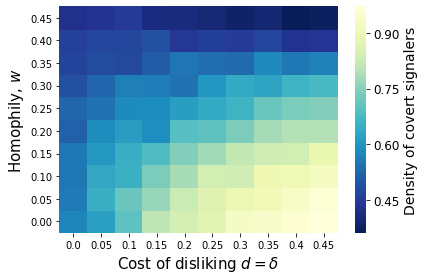

In [55]:
gb_mean = df.groupby(
    ['dislike_penalty', 'homophily', 'timestep']
)['prop_covert'].mean()

means = gb_mean.unstack(level=(0,1))

final_means = means[means.index == 200]

ax = sns.heatmap(final_means.stack(), cmap='YlGnBu_r',
                cbar_kws={'label': 'Density of covert signalers'})

# Set size of colorbar title.
ax.figure.axes[-1].yaxis.label.set_size(14)

# Set size of colorbar tick labels.
ax.collections[0].colorbar.ax.tick_params(labelsize=12)

# Clean up some other things.
ax.invert_yaxis()
# ax.set_yticklabels(['0.1', '0.25', '0.4'])
ax.set_ylabel('Homophily, $w$', size=15)
ax.set_xlabel('Cost of disliking $d=\delta$', size=15)


# relative_receptivity = df.receptivity.unique() / 0.5
# relative_receptivity.sort()
# ax.set_xticklabels(relative_receptivity)
ax.set_yticklabels([f'{y:.2f}' for y in np.arange(0, 0.46, 0.05)]);

plt.savefig(
'/Users/mt/workspace/id-sig/reports/Figures/covertDensityVsDislikingHomophilyCoevo.pdf'
)

## Covert receptivity-homophily experiment

In [43]:
df = pd.read_csv('receptivity.csv')

### Evolution of churlishness

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


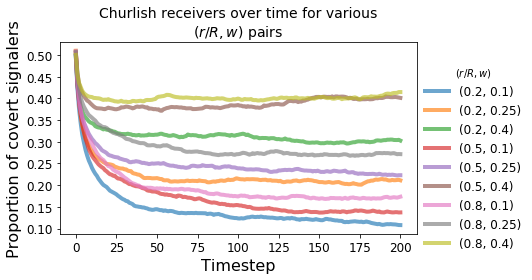

In [44]:
homophilies = [0.1, 0.25, 0.4]
receptivities = [0.1, 0.25, 0.4]

df_lim = df[df.homophily.isin(homophilies) 
            & df.receptivity.isin(receptivities)]
df_lim['receptivity'] = df_lim.receptivity / 0.5  

gb_mean_lim = df_lim.groupby(['receptivity', 'homophily', 'timestep']
                     )['prop_churlish'].mean()

means_lim = gb_mean_lim.unstack(level=(0,1))

means_lim.plot(lw=4, alpha=0.65, figsize=(7.5, 4))

plt.legend(bbox_to_anchor= (1.01, 0.9), ncol=1, title='$(r/R, w)$',
            borderaxespad=0, frameon=False, prop={'size': 12})

plt.xticks(size=12)
plt.yticks(size=12)
plt.ylabel('Proportion of covert signalers', size=16)
plt.xlabel('Timestep', size=16)
plt.title('Churlish receivers over time for various\n$(r/R, w)$ pairs', size=14)
plt.savefig('/Users/mt/workspace/id-sig/reports/Figures/receptivityHomophilyChurlishSeries.pdf')

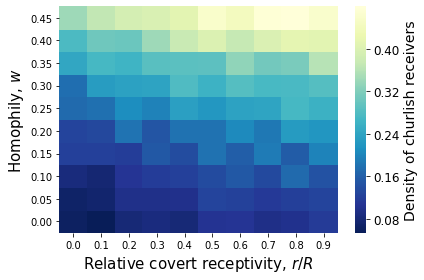

In [48]:
gb_mean = df.groupby(
    ['receptivity', 'homophily', 'timestep']
)['prop_churlish'].mean()

means = gb_mean.unstack(level=(0,1))

final_means = means[means.index == 200]

ax = sns.heatmap(final_means.stack(), cmap='YlGnBu_r',
                cbar_kws={'label': 'Density of churlish receivers'})

# Set size of colorbar title.
ax.figure.axes[-1].yaxis.label.set_size(14)

# Set size of colorbar tick labels.
ax.collections[0].colorbar.ax.tick_params(labelsize=12)

# Clean up some other things.
ax.invert_yaxis()
# ax.set_yticklabels(['0.1', '0.25', '0.4'])
ax.set_ylabel('Homophily, $w$', size=15)
ax.set_xlabel('Relative covert receptivity, $r/R$', size=15)


relative_receptivity = df.receptivity.unique() / 0.5
relative_receptivity.sort()
ax.set_xticklabels(relative_receptivity)
ax.set_yticklabels([f'{y:.2f}' for y in np.arange(0, 0.46, 0.05)]);

plt.savefig(
'/Users/mt/workspace/id-sig/reports/Figures/churlishDensityVsReceptivityHomophilyCoevo.pdf'
)

### Evolution of covert signaling

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


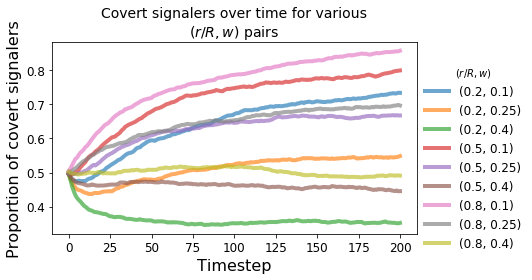

In [46]:
homophilies = [0.1, 0.25, 0.4]
receptivities = [0.1, 0.25, 0.4]

df_lim = df[df.homophily.isin(homophilies) 
            & df.receptivity.isin(receptivities)]
df_lim['receptivity'] = df_lim.receptivity / 0.5  
gb_mean_lim = df_lim.groupby(['receptivity', 'homophily', 'timestep']
                     )['prop_covert'].mean()

means_lim = gb_mean_lim.unstack(level=(0,1))

means_lim.plot(lw=4, alpha=0.65, figsize=(7.5, 4))

plt.legend(bbox_to_anchor= (1.01, 0.9), ncol=1, title='$(r/R, w)$',
            borderaxespad=0, frameon=False, prop={'size': 12})

plt.xticks(size=12)
plt.yticks(size=12)
plt.ylabel('Proportion of covert signalers', size=16)
plt.xlabel('Timestep', size=16)
plt.title('Covert signalers over time for various\n$(r/R, w)$ pairs', size=14)
plt.savefig('/Users/mt/workspace/id-sig/reports/Figures/receptivityHomophilyCovertSeries.pdf')

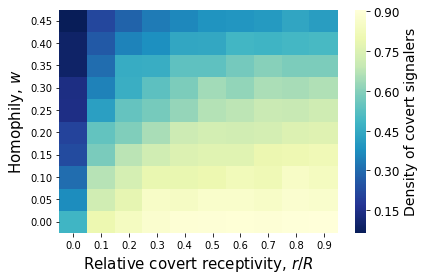

In [47]:
gb_mean = df.groupby(
    ['receptivity', 'homophily', 'timestep']
)['prop_covert'].mean()

means = gb_mean.unstack(level=(0,1))

final_means = means[means.index == 200]

ax = sns.heatmap(final_means.stack(), cmap='YlGnBu_r',
                cbar_kws={'label': 'Density of covert signalers'})

# Set size of colorbar title.
ax.figure.axes[-1].yaxis.label.set_size(14)

# Set size of colorbar tick labels.
ax.collections[0].colorbar.ax.tick_params(labelsize=12)

# Clean up some other things.
ax.invert_yaxis()
# ax.set_yticklabels(['0.1', '0.25', '0.4'])
ax.set_ylabel('Homophily, $w$', size=15)
ax.set_xlabel('Relative covert receptivity, $r/R$', size=15)


relative_receptivity = df.receptivity.unique() / 0.5
relative_receptivity.sort()
ax.set_xticklabels(relative_receptivity)
ax.set_yticklabels([f'{y:.2f}' for y in np.arange(0, 0.46, 0.05)]);

plt.savefig(
'/Users/mt/workspace/id-sig/reports/Figures/covertDensityVsReceptivityHomophilyCoevo.pdf'
)